In [2]:
from matplotlib import pyplot as plt 

In [3]:
import pandas as pd

In [4]:
sg_reports = pd.read_csv('live_birth.csv')
sg_reports

,year,ethnic_group_of_mother,age_group_of_mother,educational_qualification_of_mother,live_births
0,2005,Chinese,Under 15,No Qualification,0
1,2005,Chinese,15 - 19,No Qualification,9
2,2005,Chinese,20 - 24,No Qualification,67
3,2005,Chinese,25 - 29,No Qualification,196
4,2005,Chinese,30 - 34,No Qualification,332
5,2005,Chinese,35 - 39,No Qualification,210
6,2005,Chinese,40 - 44,No Qualification,66
7,2005,Chinese,45 - 49,No Qualification,4
8,2005,Chinese,50 - 54,No Qualification,0
9,2005,Chinese,Unknown,No Qualification,0


In [5]:
fun = {'live_births':{'Avg live births':'mean'}}
groupbyClass = sg_reports.groupby('year').agg(fun)
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'year'},inplace = True) # rename the first column
groupbyClass 

C:\Users\Niveditha Naga\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,Avg live births
0,2005,156.216667
1,2006,159.654167
2,2007,164.541667
3,2008,165.941667
4,2009,164.875000
5,2010,158.195833
6,2011,165.225000
7,2012,177.762500
8,2013,165.500000
9,2014,175.966667


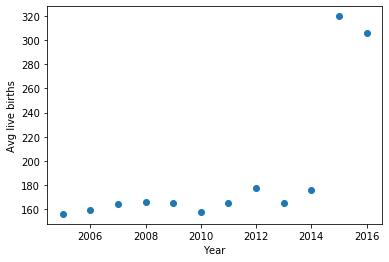

In [6]:
plt.scatter(groupbyClass['year'], groupbyClass['Avg live births'])
plt.xlabel('Year')
plt.ylabel('Avg live births')
# and plot to see data
plt.show()

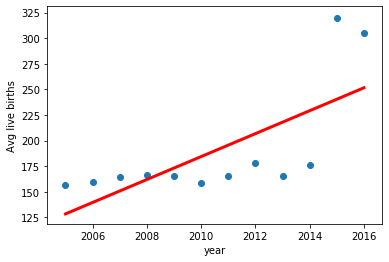

In [7]:
from scipy.stats import linregress
# We use a standard package: 
slope, intercept, r_value, p_value, std_err = linregress(groupbyClass['year'],groupbyClass['Avg live births'])
# Here's our function:
line = [slope*xi + intercept for xi in groupbyClass['year']]
# plot up the line
plt.plot(groupbyClass['year'],line,'r-', linewidth=3)
#  plot up the data points
plt.scatter(groupbyClass['year'], groupbyClass['Avg live births'])
plt.xlabel('year')
plt.ylabel('Avg live births')
plt.show()

In [8]:
slope

11.208496827246826

In [9]:
intercept

-22344.764082599497

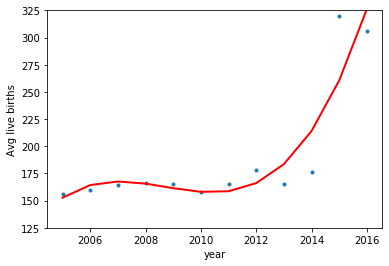

In [10]:
import numpy as np
z=np.polyfit(groupbyClass['year'],groupbyClass['Avg live births'],3)
p=np.poly1d(z)
_ = plt.plot(groupbyClass['year'], groupbyClass['Avg live births'], '.',groupbyClass['year'] , p(groupbyClass['year']), 'r-',linewidth=2)
plt.ylim(125,325)
plt.xlabel('year')
plt.ylabel('Avg live births')
plt.show()

(120, 330)

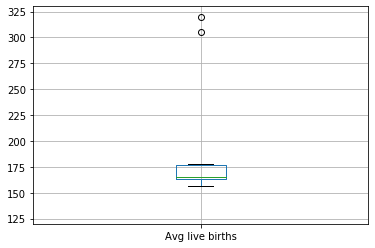

In [11]:
%matplotlib inline
groupbyClass.boxplot(column = 'Avg live births')
plt.ylim(120,330)

In [12]:
filt = sg_reports.ethnic_group_of_mother == 'Chinese'
newest_sg=sg_reports[filt]
newest_sg

,year,ethnic_group_of_mother,age_group_of_mother,educational_qualification_of_mother,live_births
0,2005,Chinese,Under 15,No Qualification,0
1,2005,Chinese,15 - 19,No Qualification,9
2,2005,Chinese,20 - 24,No Qualification,67
3,2005,Chinese,25 - 29,No Qualification,196
4,2005,Chinese,30 - 34,No Qualification,332
5,2005,Chinese,35 - 39,No Qualification,210
6,2005,Chinese,40 - 44,No Qualification,66
7,2005,Chinese,45 - 49,No Qualification,4
8,2005,Chinese,50 - 54,No Qualification,0
9,2005,Chinese,Unknown,No Qualification,0


In [13]:
fun = {'live_births':{'Total live births for chinese':'sum'}}
groupbyClass = newest_sg.groupby('year').agg(fun)
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'year'},inplace = True) # rename the first column
groupbyClass 

C:\Users\Niveditha Naga\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,Total live births for chinese
0,2005,24305
1,2006,24621
2,2007,25298
3,2008,25172
4,2009,24586
5,2010,23211
6,2011,24424
7,2012,26484
8,2013,23686
9,2014,25659


(20000, 27000)

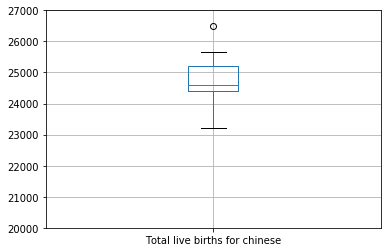

In [14]:
groupbyClass.boxplot(column = 'Total live births for chinese')
plt.ylim(20000,27000)

In [15]:
filt = sg_reports.ethnic_group_of_mother == 'Indians'
newest_sg=sg_reports[filt]
newest_sg

,year,ethnic_group_of_mother,age_group_of_mother,educational_qualification_of_mother,live_births
120,2005,Indians,Under 15,No Qualification,0
121,2005,Indians,15 - 19,No Qualification,8
122,2005,Indians,20 - 24,No Qualification,38
123,2005,Indians,25 - 29,No Qualification,72
124,2005,Indians,30 - 34,No Qualification,59
125,2005,Indians,35 - 39,No Qualification,44
126,2005,Indians,40 - 44,No Qualification,17
127,2005,Indians,45 - 49,No Qualification,2
128,2005,Indians,50 - 54,No Qualification,0
129,2005,Indians,Unknown,No Qualification,0


In [16]:
fun = {'live_births':{'Total live births for Indians':'sum'}}
groupbyClass = newest_sg.groupby('year').agg(fun)
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'year'},inplace = True) # rename the first column
groupbyClass 

C:\Users\Niveditha Naga\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,Total live births for Indians
0,2005,3325
1,2006,3497
2,2007,3626
3,2008,3663
4,2009,3814
5,2010,3941
6,2011,3982
7,2012,4265
8,2013,4185
9,2014,4272


(3000, 7000)

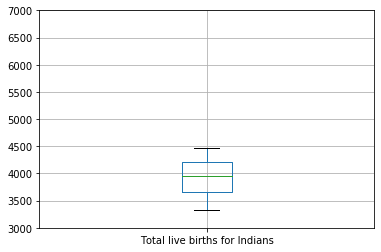

In [17]:
groupbyClass.boxplot(column = 'Total live births for Indians')
plt.ylim(3000,7000)

In [18]:
filt = sg_reports.ethnic_group_of_mother == 'Malays'
newest_sg=sg_reports[filt]
newest_sg

,year,ethnic_group_of_mother,age_group_of_mother,educational_qualification_of_mother,live_births
60,2005,Malays,Under 15,No Qualification,1
61,2005,Malays,15 - 19,No Qualification,43
62,2005,Malays,20 - 24,No Qualification,157
63,2005,Malays,25 - 29,No Qualification,211
64,2005,Malays,30 - 34,No Qualification,210
65,2005,Malays,35 - 39,No Qualification,133
66,2005,Malays,40 - 44,No Qualification,59
67,2005,Malays,45 - 49,No Qualification,5
68,2005,Malays,50 - 54,No Qualification,0
69,2005,Malays,Unknown,No Qualification,0


In [19]:
fun = {'live_births':{'Total live births for Malays':'sum'}}
groupbyClass = newest_sg.groupby('year').agg(fun)
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'year'},inplace = True) # rename the first column
groupbyClass 

C:\Users\Niveditha Naga\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,Total live births for Malays
0,2005,7237
1,2006,7200
2,2007,7045
3,2008,6969
4,2009,6704
5,2010,6222
6,2011,6293
7,2012,6486
8,2013,6521
9,2014,6861


(6000, 10000)

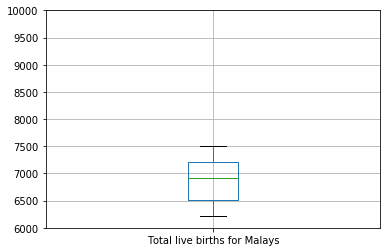

In [20]:
groupbyClass.boxplot(column = 'Total live births for Malays')
plt.ylim(6000,10000)

In [21]:
filt = sg_reports.educational_qualification_of_mother == 'No Qualification'
newest_sg=sg_reports[filt]
newest_sg

,year,ethnic_group_of_mother,age_group_of_mother,educational_qualification_of_mother,live_births
0,2005,Chinese,Under 15,No Qualification,0
1,2005,Chinese,15 - 19,No Qualification,9
2,2005,Chinese,20 - 24,No Qualification,67
3,2005,Chinese,25 - 29,No Qualification,196
4,2005,Chinese,30 - 34,No Qualification,332
5,2005,Chinese,35 - 39,No Qualification,210
6,2005,Chinese,40 - 44,No Qualification,66
7,2005,Chinese,45 - 49,No Qualification,4
8,2005,Chinese,50 - 54,No Qualification,0
9,2005,Chinese,Unknown,No Qualification,0


In [22]:
fun = {'live_births':{'Total live births for mothers with no qualification':'sum'}}
groupbyClass = newest_sg.groupby('year').agg(fun)
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'year'},inplace = True) # rename the first column
groupbyClass 

C:\Users\Niveditha Naga\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,Total live births for mothers with no qualification
0,2005,2104
1,2006,1972
2,2007,1683
3,2008,1560
4,2009,1509
5,2010,1219
6,2011,1129
7,2012,1133
8,2013,921
9,2014,900


(600, 2200)

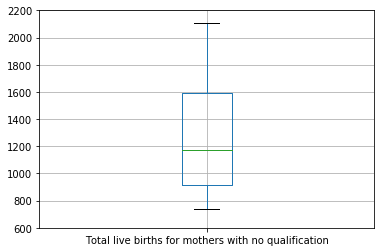

In [23]:
groupbyClass.boxplot(column = 'Total live births for mothers with no qualification')
plt.ylim(600,2200)

In [24]:
filt = sg_reports.educational_qualification_of_mother == 'University'
newest_sg=sg_reports[filt]
newest_sg

,year,ethnic_group_of_mother,age_group_of_mother,educational_qualification_of_mother,live_births
40,2005,Chinese,Under 15,University,0
41,2005,Chinese,15 - 19,University,0
42,2005,Chinese,20 - 24,University,80
43,2005,Chinese,25 - 29,University,2426
44,2005,Chinese,30 - 34,University,4348
45,2005,Chinese,35 - 39,University,1398
46,2005,Chinese,40 - 44,University,153
47,2005,Chinese,45 - 49,University,3
48,2005,Chinese,50 - 54,University,0
49,2005,Chinese,Unknown,University,0


In [25]:
fun = {'live_births':{'Total live births for mothers with university education':'sum'}}
groupbyClass = newest_sg.groupby('year').agg(fun)
groupbyClass = groupbyClass.reset_index() # reset its index
groupbyClass.columns = groupbyClass.columns.droplevel(0) # drop level 0 index
groupbyClass.rename(columns = {'':'year'},inplace = True) # rename the first column
groupbyClass 

C:\Users\Niveditha Naga\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,year,Total live births for mothers with university education
0,2005,11255
1,2006,12173
2,2007,14463
3,2008,16105
4,2009,16881
5,2010,17160
6,2011,18821
7,2012,21058
8,2013,20677
9,2014,22255


(10000, 25000)

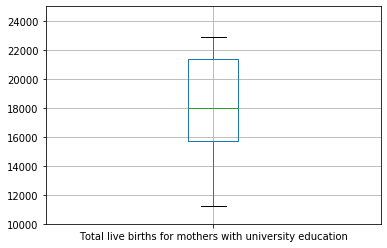

In [26]:
groupbyClass.boxplot(column = 'Total live births for mothers with university education')
plt.ylim(10000,25000)